Barbie Movie Review

We have IMDb ratings from 1-10

If the rating is less than or equal to 4, it will return 0, which corresponds to the "Negative" sentiment.

If the rating is greater than 4 and less than or equal to 7, it will return 1, which corresponds to the "Neutral" sentiment.

If the rating is greater than 7, it will return 2, which corresponds to the "Positive" sentiment.

Comparing accuracy of support vector machine and random forest

Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


 Defining Sentiment Labeling Function

In [10]:
def sentiment_label(rating):
    if rating <= 4:
        return 'Negative'
    elif rating <= 7:
        return 'Neutral'
    else:
        return 'Positive'


Loading and Preprocessing Data

In [3]:
# Load the dataset
dataset = pd.read_csv('/content/barbie_information.csv')

# Sentiment Labeling
dataset['sentiment_label'] = dataset['rating'].apply(sentiment_label)

# Data Preprocessing
X = dataset['sentiment']
y = dataset['sentiment_label']


Text Processing and Train-Test Split

In [4]:
# Text Processing using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


Support Vector Machine Model

In [5]:
# Support Vector Machine Model
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Model Evaluation - Support Vector Machine
y_pred_svm = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)


In [8]:
print(svm_accuracy)

0.58125


Random Forest Model

In [6]:
# Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Model Evaluation - Random Forest
y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)


In [9]:
print(rf_accuracy)

0.46875


Plotting the Graphs

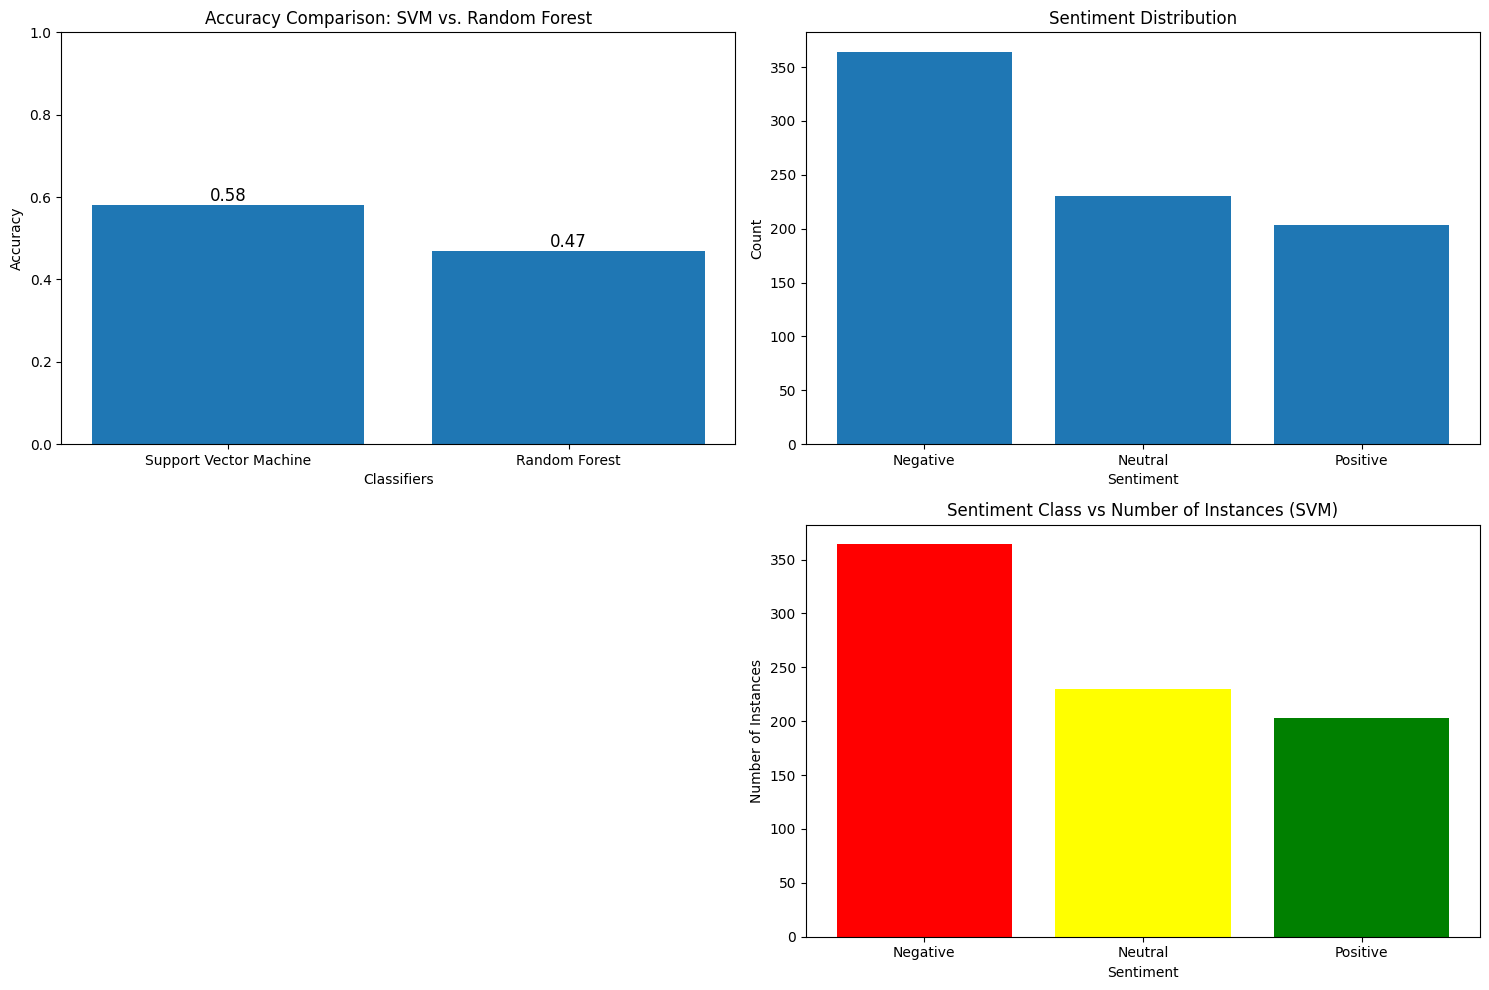

In [7]:
# Plotting the graphs
classifiers = ['Support Vector Machine', 'Random Forest']
accuracies = [svm_accuracy, rf_accuracy]

plt.figure(figsize=(15, 10))

# Plot 1: Accuracy Comparison
plt.subplot(2, 2, 1)
plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: SVM vs. Random Forest')
plt.ylim(0, 1.0)
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Plot 2: Sentiment Distribution
plt.subplot(2, 2, 2)
sentiment_counts = dataset['sentiment_label'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

# Plot 3: Sentiment Class vs Number of Instances (SVM)
plt.subplot(2, 2, 4)
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'yellow', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Instances')
plt.title('Sentiment Class vs Number of Instances (SVM)')

plt.tight_layout()
plt.show()
